In [2]:
#Importar librerias
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2
import seaborn as sns
import numpy as np
from numpy.linalg import cond
from sklearn.covariance import LedoitWolf
from numpy.linalg import pinv
from sklearn import preprocessing
from numpy.linalg import eig
from datetime import datetime

In [3]:
#Configurar colab para tomar datos de drive
from google.colab import drive  
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
#Cargar datos
path = '/content/gdrive/MyDrive/proyecto-integrador-grupo1/proyecto-integrador-data/marketing_campaign_transformed.csv'
df = pd.read_csv(path, index_col=0)
df.head()

,ID,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,57,58138.0,0,663.0,58,0,1,0,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,60,46344.0,2,113.0,38,0,1,0,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,49,71613.0,0,312.0,26,1,1,0,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,30,26646.0,1,139.0,26,1,1,0,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,33,58293.0,1,161.0,94,1,0,1,173,...,3,6,5,0,0,0,0,0,0,0


In [5]:
#Informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2216 non-null   int64  
 1   User_Age                2216 non-null   int64  
 2   Income                  2216 non-null   float64
 3   Child_Count             2216 non-null   int64  
 4   Day_Cnt                 2216 non-null   float64
 5   Recency                 2216 non-null   int64  
 6   Marital_Status_Joined   2216 non-null   int64  
 7   Education_Graduate      2216 non-null   int64  
 8   Education_Postgraduate  2216 non-null   int64  
 9   MntWines                2216 non-null   int64  
 10  MntFruits               2216 non-null   int64  
 11  MntMeatProducts         2216 non-null   int64  
 12  MntFishProducts         2216 non-null   int64  
 13  MntSweetProducts        2216 non-null   int64  
 14  MntGoldProds            2216 non-null   

In [6]:
#Agregar el gasto total
df['Spent'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df.head()

,ID,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,5524,57,58138.0,0,663.0,58,0,1,0,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,60,46344.0,2,113.0,38,0,1,0,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,49,71613.0,0,312.0,26,1,1,0,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,30,26646.0,1,139.0,26,1,1,0,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,33,58293.0,1,161.0,94,1,0,1,173,...,6,5,0,0,0,0,0,0,0,422


In [7]:
#Descripcion del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
User_Age,2216.0,45.225632,11.986395,18.0,37.00,44.0,55.00,121.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Child_Count,2216.0,0.949007,0.750391,0.0,0.00,1.0,1.00,3.0
Day_Cnt,2216.0,353.374549,201.938174,0.0,181.00,353.0,529.00,699.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
Marital_Status_Joined,2216.0,0.645307,0.478528,0.0,0.00,1.0,1.00,1.0
Education_Graduate,2216.0,0.503610,0.500100,0.0,0.00,1.0,1.00,1.0
Education_Postgraduate,2216.0,0.381769,0.485930,0.0,0.00,0.0,1.00,1.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0


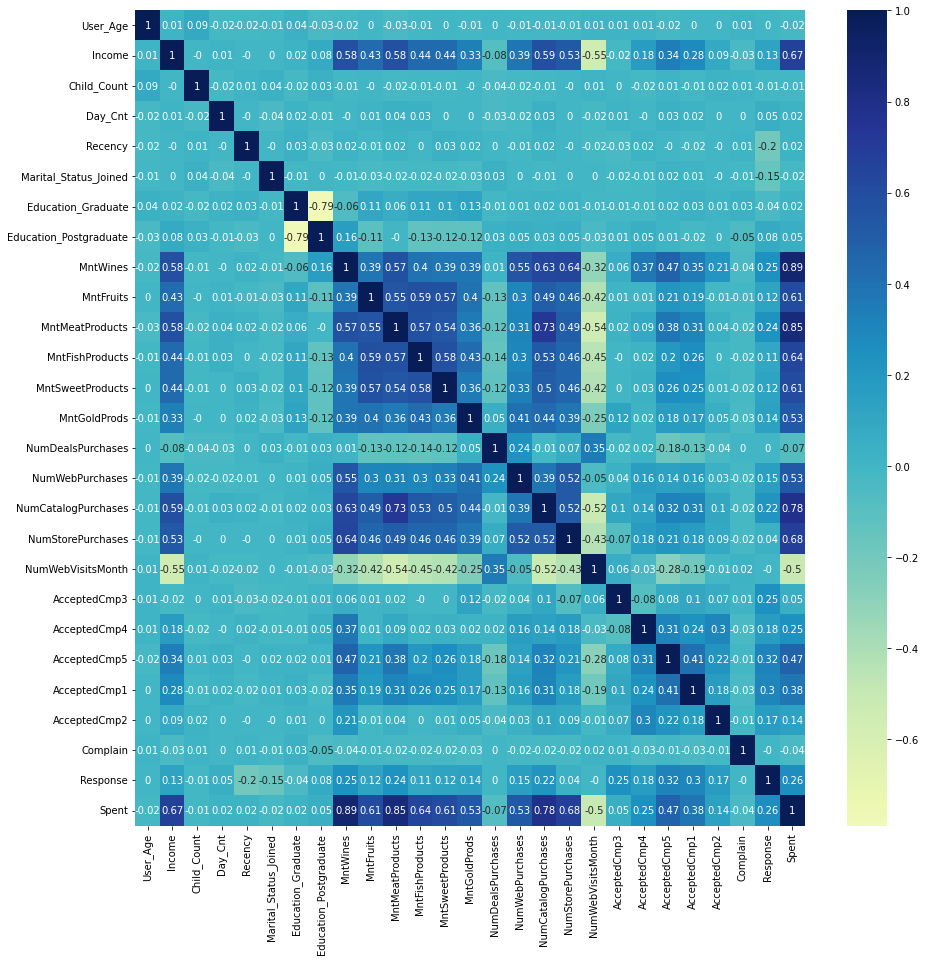

In [10]:
#Diagrama de correlacion
plt.figure(figsize=(15,15))  
sns.heatmap(df.iloc[:,1:].corr().round(2),annot=True, center=0, cmap="YlGnBu")

In [ ]:
#Funcion para escalar datos
def data_scaler(data):
  scale = preprocessing.StandardScaler().fit(data)
  return scale.transform(data)

In [ ]:
#Calcular PCA con componentes fijos
def get_pca(comp,data):
  pca = PCA(n_components=comp)
  return pca.fit_transform(data)

In [ ]:
#Calcular la varianza explicada según los componentes
def plot_pca(data):
  pca = PCA()
  pca = pca.fit(data)
  exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

  return px.area(
      x=range(1, exp_var_cumul.shape[0] + 1),
      y=exp_var_cumul,
      labels={"x": "Numero de componentes", "y": "Varianza explicada"}
  )

In [ ]:
# Funcion para calcular la distancia de  Mahalanobis 
def get_mahalanobis(data):
  cov = LedoitWolf().fit(data)
  mu = np.median(data,axis=0)
  d_cov = cov.covariance_
  d_inv_cov = np.linalg.pinv(d_cov)
  mahal = []
  for i, x_data in enumerate(data):
        dist = (x_data-mu).T.dot(d_inv_cov).dot(x_data-mu)
        mahal.append(dist)
  return np.array(mahal)

In [ ]:
#Funcion para quitar los outlier con p-value menor a 0.01
def outliers_p(p_mahal,df_p):
  for p in range(0, len(p_mahal)):
    if p_mahal[p]<0.001:
      df_p = df_p.drop(p)
  return df_p.reset_index(drop=True)

In [ ]:
#PCA para reducir la dimensionalidad del numero de compras en los medios
df_purchases = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']]
df_purchases.head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4
3,2,2,0,4,6
4,5,5,3,6,5


In [ ]:
data_scaled = data_scaler(df_purchases)
plot_pca(data_scaled)

In [ ]:
df.head()

,ID,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,5524,57,58138.0,0,663.0,58,0,1,0,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,60,46344.0,2,113.0,38,0,1,0,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,49,71613.0,0,312.0,26,1,1,0,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,30,26646.0,1,139.0,26,1,1,0,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,33,58293.0,1,161.0,94,1,0,1,173,...,6,5,0,0,0,0,0,0,0,422


In [ ]:
len(df.columns)

28

In [ ]:
#Visualizar los datos en 3 componentes
data_scaled = data_scaler(df_purchases)
pca_data_scaled = get_pca(3, data_scaled)
df_pca_scaled =  pd.DataFrame(pca_data_scaled, columns =['Purchases_Z1','Purchases_Z2','Purchases_Z3'])
fig = px.scatter_3d(df_pca_scaled , x='Purchases_Z1',y='Purchases_Z2',z='Purchases_Z3')
fig.show()

In [ ]:
# PCA analysis
pca_analysis = PCA()
pca_analysis.fit(data_scaler(df_purchases))
print(pca_analysis.components_)

[[ 0.01934713 -0.41991395 -0.55351013 -0.5605943   0.45017611]
 [ 0.72026653  0.46959062 -0.05305099  0.12145623  0.49308696]
 [ 0.64366126 -0.59132974  0.35332637 -0.1302207  -0.30697291]
 [-0.15443978  0.25429101  0.65072054 -0.66404731  0.2169986 ]
 [ 0.20661643  0.4345367  -0.37753859 -0.4615909  -0.64256203]]


In [ ]:
#Encontra atipicos en las componentes princiales con el p-value en mahalanobis
mahal_purch = get_mahalanobis(pca_data_scaled)
p_mahal_purch = 1 - chi2.cdf(mahal_purch, 3)
p_mahal_purch

array([0.51480955, 0.70728076, 0.22372971, ..., 0.86838095, 0.57756977,
       0.88386153])

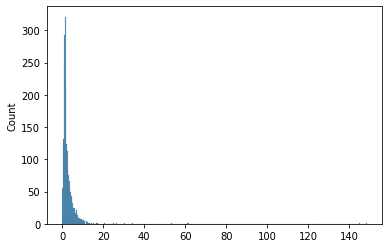

In [ ]:
sns.histplot(data=mahal_purch,)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2216 non-null   int64  
 1   User_Age                2216 non-null   int64  
 2   Income                  2216 non-null   float64
 3   Child_Count             2216 non-null   int64  
 4   Day_Cnt                 2216 non-null   float64
 5   Recency                 2216 non-null   int64  
 6   Marital_Status_Joined   2216 non-null   int64  
 7   Education_Graduate      2216 non-null   int64  
 8   Education_Postgraduate  2216 non-null   int64  
 9   MntWines                2216 non-null   int64  
 10  MntFruits               2216 non-null   int64  
 11  MntMeatProducts         2216 non-null   int64  
 12  MntFishProducts         2216 non-null   int64  
 13  MntSweetProducts        2216 non-null   int64  
 14  MntGoldProds            2216 non-null   

In [ ]:
df_clean = pd.concat([df.iloc[:,1:15], df.iloc[:,20:28]], axis=1, join="inner")
df_clean.head()

,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,57,58138.0,0,663.0,58,0,1,0,635,88,...,88,88,0,0,0,0,0,0,1,1617
1,60,46344.0,2,113.0,38,0,1,0,11,1,...,1,6,0,0,0,0,0,0,0,27
2,49,71613.0,0,312.0,26,1,1,0,426,49,...,21,42,0,0,0,0,0,0,0,776
3,30,26646.0,1,139.0,26,1,1,0,11,4,...,3,5,0,0,0,0,0,0,0,53
4,33,58293.0,1,161.0,94,1,0,1,173,43,...,27,15,0,0,0,0,0,0,0,422


In [ ]:
df_clean.columns

Index(['User_Age', 'Income', 'Child_Count', 'Day_Cnt', 'Recency',
       'Marital_Status_Joined', 'Education_Graduate', 'Education_Postgraduate',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Spent'],
      dtype='object')

In [ ]:
df_clean = pd.concat([df_clean, df_pca_scaled], axis=1, join="inner")
df_clean.head()

,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Purchases_Z1,Purchases_Z2,Purchases_Z3
0,57,58138.0,0,663.0,58,0,1,0,635,88,...,0,0,0,0,0,1,1617,-1.356723,1.065805,0.125977
1,60,46344.0,2,113.0,38,0,1,0,11,1,...,0,0,0,0,0,0,27,1.382012,-0.826501,0.548390
2,49,71613.0,0,312.0,26,1,1,0,426,49,...,0,0,0,0,0,0,776,-1.455412,0.076022,-1.369982
3,30,26646.0,1,139.0,26,1,1,0,11,4,...,0,0,0,0,0,0,53,1.258620,-0.358916,0.005120
4,33,58293.0,1,161.0,94,1,0,1,173,43,...,0,0,0,0,0,0,422,-0.269030,1.095667,0.770477


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_Age                2216 non-null   int64  
 1   Income                  2216 non-null   float64
 2   Child_Count             2216 non-null   int64  
 3   Day_Cnt                 2216 non-null   float64
 4   Recency                 2216 non-null   int64  
 5   Marital_Status_Joined   2216 non-null   int64  
 6   Education_Graduate      2216 non-null   int64  
 7   Education_Postgraduate  2216 non-null   int64  
 8   MntWines                2216 non-null   int64  
 9   MntFruits               2216 non-null   int64  
 10  MntMeatProducts         2216 non-null   int64  
 11  MntFishProducts         2216 non-null   int64  
 12  MntSweetProducts        2216 non-null   int64  
 13  MntGoldProds            2216 non-null   int64  
 14  AcceptedCmp3            2216 non-null   

In [ ]:
#Quitar los outlier con p-value menor a 0.01
df_clean = outliers_p(p_mahal_purch,df_clean)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_Age                2189 non-null   int64  
 1   Income                  2189 non-null   float64
 2   Child_Count             2189 non-null   int64  
 3   Day_Cnt                 2189 non-null   float64
 4   Recency                 2189 non-null   int64  
 5   Marital_Status_Joined   2189 non-null   int64  
 6   Education_Graduate      2189 non-null   int64  
 7   Education_Postgraduate  2189 non-null   int64  
 8   MntWines                2189 non-null   int64  
 9   MntFruits               2189 non-null   int64  
 10  MntMeatProducts         2189 non-null   int64  
 11  MntFishProducts         2189 non-null   int64  
 12  MntSweetProducts        2189 non-null   int64  
 13  MntGoldProds            2189 non-null   int64  
 14  AcceptedCmp3            2189 non-null   

In [ ]:
#Verificar en la grafica que se hayan eliminado datos atipicos
fig = px.scatter_3d(df_clean.iloc[:,22:25] , x='Purchases_Z1',y='Purchases_Z2',z='Purchases_Z3')
fig.show()

In [ ]:
df.head()

,ID,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,5524,57,58138.0,0,663.0,58,0,1,0,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,60,46344.0,2,113.0,38,0,1,0,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,49,71613.0,0,312.0,26,1,1,0,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,30,26646.0,1,139.0,26,1,1,0,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,33,58293.0,1,161.0,94,1,0,1,173,...,6,5,0,0,0,0,0,0,0,422


In [ ]:
#Revisar si en Child_Count hay cantidades atipicas
df['Child_Count'].unique()

array([0, 2, 1, 3])

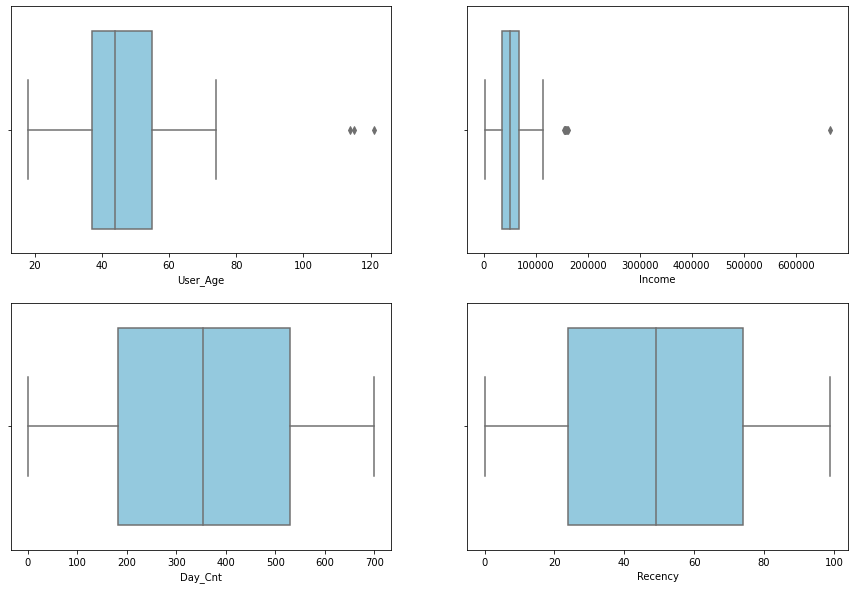

In [ ]:
#Graficar boxplot de variables no binarias
numeric_col = ['User_Age','Income',	'Day_Cnt','Recency'	]
n = len(numeric_col)
fig, axs = plt.subplots(int(n/2), 2, figsize=(15, 10))
x,y = 0,0
for i in range(0,n):
    sns.boxplot(data=df, x=numeric_col[i], color="skyblue", ax=axs[x,y])
    y +=1
    if y==2:
      x +=1
      y=0

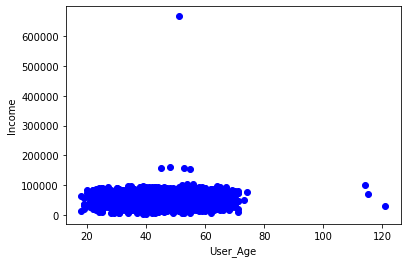

In [ ]:
#Estandarizar y graficar User_Age y Income 
df_age_inc = df_clean[['User_Age','Income']]
age_inc_scaled = data_scaler(df_age_inc)
plt.scatter(df_clean.iloc[:,0].values, df_clean.iloc[:,1].values, c ="blue")
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2]);
plt.show()

In [ ]:
df_clean.iloc[:,1].values

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [ ]:
##Encontra atipicos en las componentes princiales con el p-value en mahalanobis
mahal_age_inc = get_mahalanobis(age_inc_scaled)
p_mahal_age_inc = 1 - chi2.cdf(mahal_age_inc, 2)
p_mahal_age_inc

array([0.53442075, 0.40205034, 0.65506878, ..., 0.11053621, 0.67868986,
       0.40928484])

In [ ]:
#Quitar los outlier con p-value menor a 0.001
df_clean = outliers_p(p_mahal_age_inc,df_clean)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_Age                2181 non-null   int64  
 1   Income                  2181 non-null   float64
 2   Child_Count             2181 non-null   int64  
 3   Day_Cnt                 2181 non-null   float64
 4   Recency                 2181 non-null   int64  
 5   Marital_Status_Joined   2181 non-null   int64  
 6   Education_Graduate      2181 non-null   int64  
 7   Education_Postgraduate  2181 non-null   int64  
 8   MntWines                2181 non-null   int64  
 9   MntFruits               2181 non-null   int64  
 10  MntMeatProducts         2181 non-null   int64  
 11  MntFishProducts         2181 non-null   int64  
 12  MntSweetProducts        2181 non-null   int64  
 13  MntGoldProds            2181 non-null   int64  
 14  AcceptedCmp3            2181 non-null   

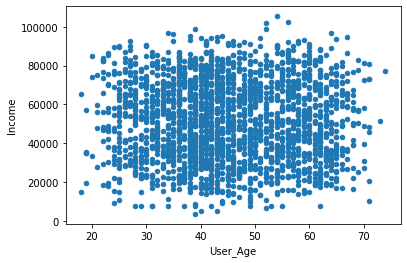

In [ ]:
#Verificar en la grafica que se hayan eliminado datos atipicos
df_clean.plot.scatter(x='User_Age',y='Income')

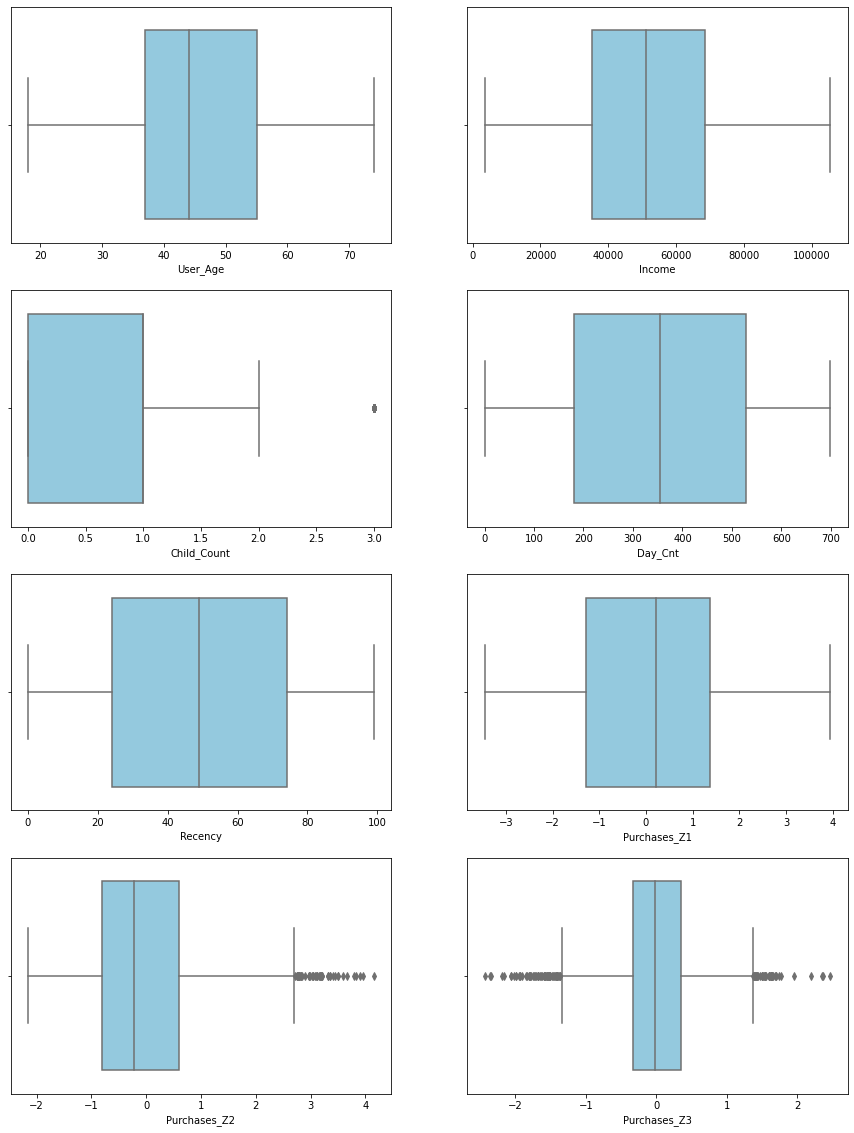

In [ ]:
#Graficar boxplot de variables no binarias
numeric_col = ['User_Age','Income',	'Child_Count','Day_Cnt','Recency','Purchases_Z1','Purchases_Z2','Purchases_Z3'	]
n = len(numeric_col)
fig, axs = plt.subplots(int(n/2), 2, figsize=(15, 20))
x,y = 0,0
for i in range(0,n):
    sns.boxplot(data=df_clean, x=numeric_col[i], color="skyblue", ax=axs[x,y])
    y +=1
    if y==2:
      x +=1
      y=0

In [ ]:
df_clean.columns

Index(['User_Age', 'Income', 'Child_Count', 'Day_Cnt', 'Recency',
       'Marital_Status_Joined', 'Education_Graduate', 'Education_Postgraduate',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Spent', 'Purchases_Z1', 'Purchases_Z2', 'Purchases_Z3'],
      dtype='object')

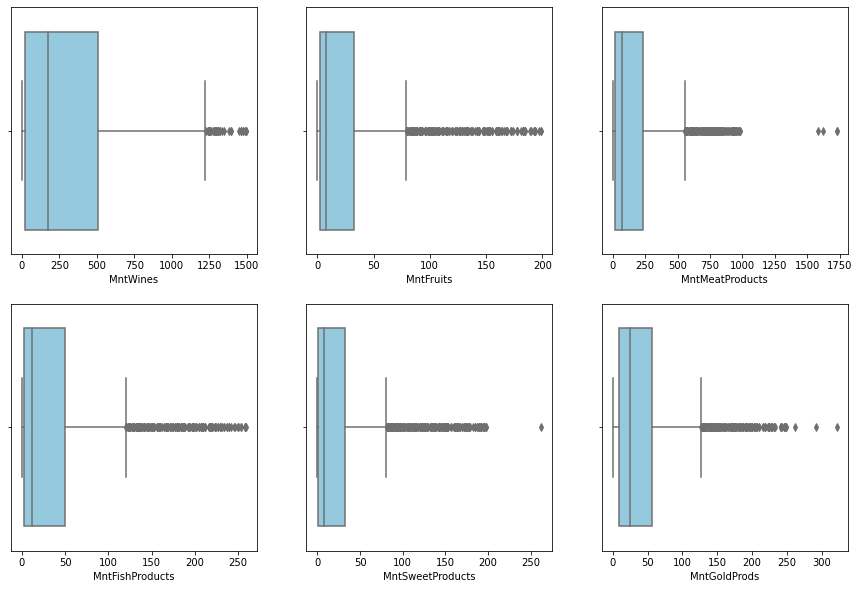

In [ ]:
#Graficar boxplot de variables a estimar
numeric_col = [ 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds']
n = len(numeric_col)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
x,y = 0,0
for i in range(0,n):
    sns.boxplot(data=df, x=numeric_col[i], color="skyblue", ax=axs[x,y])
    y +=1
    if y==3:
      x +=1
      y=0

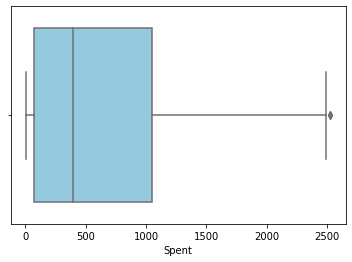

In [ ]:
sns.boxplot(data=df, x='Spent', color="skyblue")

In [ ]:
#Estandarizar variables de spent
df_spent = df_clean[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds','Spent']]
spent_scaled = data_scaler(df_spent)

In [ ]:
#Aplicar mahalanobis para las variables a estimar
mahal_spent = get_mahalanobis(spent_scaled)
p_mahal_spent = 1 - chi2.cdf(mahal_spent, 7)
p_mahal_spent

array([0.04624536, 0.55879218, 0.13680553, ..., 0.08870181, 0.40450473,
       0.57868432])

In [ ]:
#Quitar los outlier con p-value menor a 0.001
df_clean = outliers_p(p_mahal_spent,df_clean)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_Age                1924 non-null   int64  
 1   Income                  1924 non-null   float64
 2   Child_Count             1924 non-null   int64  
 3   Day_Cnt                 1924 non-null   float64
 4   Recency                 1924 non-null   int64  
 5   Marital_Status_Joined   1924 non-null   int64  
 6   Education_Graduate      1924 non-null   int64  
 7   Education_Postgraduate  1924 non-null   int64  
 8   MntWines                1924 non-null   int64  
 9   MntFruits               1924 non-null   int64  
 10  MntMeatProducts         1924 non-null   int64  
 11  MntFishProducts         1924 non-null   int64  
 12  MntSweetProducts        1924 non-null   int64  
 13  MntGoldProds            1924 non-null   int64  
 14  AcceptedCmp3            1924 non-null   

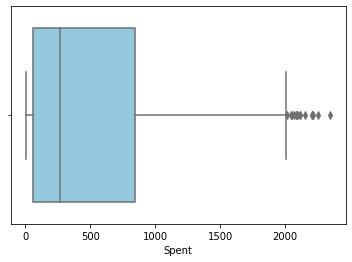

In [ ]:
sns.boxplot(data=df_clean, x='Spent', color="skyblue")

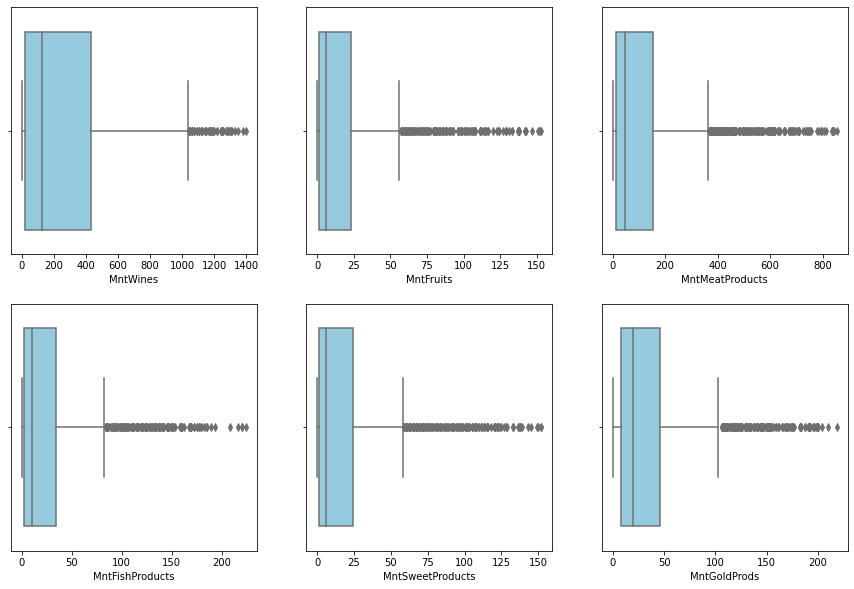

In [ ]:
#Graficar boxplot de variables a estimar
numeric_col = [ 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds']
n = len(numeric_col)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
x,y = 0,0
for i in range(0,n):
    sns.boxplot(data=df_clean, x=numeric_col[i], color="skyblue", ax=axs[x,y])
    y +=1
    if y==3:
      x +=1
      y=0

In [ ]:
df_clean.head()

,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Purchases_Z1,Purchases_Z2,Purchases_Z3
0,57,58138.0,0,663.0,58,0,1,0,635,88,...,0,0,0,0,0,1,1617,-1.356723,1.065805,0.125977
1,60,46344.0,2,113.0,38,0,1,0,11,1,...,0,0,0,0,0,0,27,1.382012,-0.826501,0.548390
2,49,71613.0,0,312.0,26,1,1,0,426,49,...,0,0,0,0,0,0,776,-1.455412,0.076022,-1.369982
3,30,26646.0,1,139.0,26,1,1,0,11,4,...,0,0,0,0,0,0,53,1.258620,-0.358916,0.005120
4,33,58293.0,1,161.0,94,1,0,1,173,43,...,0,0,0,0,0,0,422,-0.269030,1.095667,0.770477


In [ ]:
clean_output_file = '/content/gdrive/MyDrive/proyecto-integrador-grupo1/proyecto-integrador-data/marketing_campaign_clean.csv'
df_clean.to_csv(clean_output_file)